<a href="https://colab.research.google.com/github/caiogiffoni/data-science-python/blob/main/Retorno_de_Ativos_%2B_Tesouro_Direto_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Primeiro, lendo o arquivo com os dados da ações, suas quantidades e a data de compra

- É necessário ter o arquivo 'CarteiraComTD.xlsx' com o raiz na pasta
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yfin

yfin.pdr_override()

carteira = pd.read_excel('./CarteiraComTD.xlsx')

display(carteira)

,Ativos,Tipo,Qtde,Compra data
0,ITUB3,Ação,400,2020-05-05
1,ENEV3,Ação,300,2020-05-06
2,WEGE3,Ação,500,2020-05-08
3,FLRY3,Ação,100,2020-05-10
4,VILG11,FII,300,2020-05-12
5,ABEV3,Ação,200,2020-09-09
6,BCRI11,FII,100,2020-10-11
7,SMAL11,ETF,100,2020-11-02
8,MGLU3,Ação,20,2020-12-03
9,BOVA11,ETF,100,2021-05-01


### Criando dataframe de Cotações dos ativos da carteira

In [68]:
cotacao_carteira = pd.DataFrame()
cotacao_carteira_normalizada = pd.DataFrame()
retorno_carteira = pd.DataFrame()

dia_analise_fim='2022-12-31'

for index, stock in enumerate(carteira['Ativos']):
    if 'Tesouro' not in stock:
        dia_compra = carteira['Compra data'][index].strftime('%Y-%m-%d')
        handle = web.get_data_yahoo(f"{stock}.SA",start=dia_compra,end=dia_analise_fim)['Adj Close']
        handle = handle.ffill()
        cotacao_carteira[stock] = handle.copy()
        cotacao_carteira_normalizada[stock] = handle / handle.iloc[0]
        retorno_carteira[stock] = handle.copy()

print('Terminado')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Terminado


### Verificação dos dados

In [69]:
# dados veiram com muitos NaN, pois os artigos ainda não haviam sido comprado naquela data e as datas viream em formato ISO
display(cotacao_carteira)
display(cotacao_carteira_normalizada)
display(retorno_carteira)

display(cotacao_carteira.info())
display(cotacao_carteira_normalizada.info())
display(retorno_carteira.info())


,ITUB3,ENEV3,WEGE3,FLRY3,VILG11,ABEV3,BCRI11,SMAL11,MGLU3,BOVA11,BBDC3,CIEL3,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-05-05 00:00:00-03:00,19.808966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-06 00:00:00-03:00,19.536364,8.8675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-07 00:00:00-03:00,18.900293,8.6750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08 00:00:00-03:00,19.390985,8.8750,18.502810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-11 00:00:00-03:00,19.727188,8.8850,18.788288,17.867832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-03:00,21.842375,11.9000,38.500000,15.780000,97.065269,14.62,94.754654,97.800003,2.68,106.000000,12.815220,5.091296,139.934723,97.595604
2022-12-26 00:00:00-03:00,21.562599,11.4000,38.189999,15.490000,97.194359,14.52,95.377777,96.879997,2.66,105.150002,12.517862,5.130000,137.611420,97.327614
2022-12-27 00:00:00-03:00,21.362761,11.4000,38.009998,15.700000,99.150558,14.52,95.615158,94.199997,2.52,104.900002,12.594599,5.080000,136.817123,97.823883


,ITUB3,ENEV3,WEGE3,FLRY3,VILG11,ABEV3,BCRI11,SMAL11,MGLU3,BOVA11,BBDC3,CIEL3,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-05-05 00:00:00-03:00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-06 00:00:00-03:00,0.986238,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-07 00:00:00-03:00,0.954128,0.978292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08 00:00:00-03:00,0.978899,1.000846,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-11 00:00:00-03:00,0.995872,1.001973,1.015429,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-03:00,1.102651,1.341979,2.080765,0.883151,0.934884,1.335384,0.977217,0.889253,0.115225,0.924311,0.763078,1.620097,0.999376,1.096234
2022-12-26 00:00:00-03:00,1.088527,1.285593,2.064011,0.866921,0.936127,1.326250,0.983643,0.880887,0.114365,0.916899,0.745372,1.632413,0.982783,1.093224
2022-12-27 00:00:00-03:00,1.078439,1.285593,2.054283,0.878674,0.954968,1.326250,0.986092,0.856519,0.108346,0.914719,0.749941,1.616503,0.977111,1.098798


,ITUB3,ENEV3,WEGE3,FLRY3,VILG11,ABEV3,BCRI11,SMAL11,MGLU3,BOVA11,BBDC3,CIEL3,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-05-05 00:00:00-03:00,19.808966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-06 00:00:00-03:00,19.536364,8.8675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-07 00:00:00-03:00,18.900293,8.6750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08 00:00:00-03:00,19.390985,8.8750,18.502810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-11 00:00:00-03:00,19.727188,8.8850,18.788288,17.867832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-03:00,21.842375,11.9000,38.500000,15.780000,97.065269,14.62,94.754654,97.800003,2.68,106.000000,12.815220,5.091296,139.934723,97.595604
2022-12-26 00:00:00-03:00,21.562599,11.4000,38.189999,15.490000,97.194359,14.52,95.377777,96.879997,2.66,105.150002,12.517862,5.130000,137.611420,97.327614
2022-12-27 00:00:00-03:00,21.362761,11.4000,38.009998,15.700000,99.150558,14.52,95.615158,94.199997,2.52,104.900002,12.594599,5.080000,136.817123,97.823883


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 662 entries, 2020-05-05 00:00:00-03:00 to 2022-12-29 00:00:00-03:00
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ITUB3   662 non-null    float64
 1   ENEV3   661 non-null    float64
 2   WEGE3   659 non-null    float64
 3   FLRY3   658 non-null    float64
 4   VILG11  657 non-null    float64
 5   ABEV3   573 non-null    float64
 6   BCRI11  550 non-null    float64
 7   SMAL11  536 non-null    float64
 8   MGLU3   515 non-null    float64
 9   BOVA11  417 non-null    float64
 10  BBDC3   416 non-null    float64
 11  CIEL3   413 non-null    float64
 12  KNRI11  409 non-null    float64
 13  XPLG11  159 non-null    float64
dtypes: float64(14)
memory usage: 93.7 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 662 entries, 2020-05-05 00:00:00-03:00 to 2022-12-29 00:00:00-03:00
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ITUB3   662 non-null    float64
 1   ENEV3   661 non-null    float64
 2   WEGE3   659 non-null    float64
 3   FLRY3   658 non-null    float64
 4   VILG11  657 non-null    float64
 5   ABEV3   573 non-null    float64
 6   BCRI11  550 non-null    float64
 7   SMAL11  536 non-null    float64
 8   MGLU3   515 non-null    float64
 9   BOVA11  417 non-null    float64
 10  BBDC3   416 non-null    float64
 11  CIEL3   413 non-null    float64
 12  KNRI11  409 non-null    float64
 13  XPLG11  159 non-null    float64
dtypes: float64(14)
memory usage: 93.7 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 662 entries, 2020-05-05 00:00:00-03:00 to 2022-12-29 00:00:00-03:00
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ITUB3   662 non-null    float64
 1   ENEV3   661 non-null    float64
 2   WEGE3   659 non-null    float64
 3   FLRY3   658 non-null    float64
 4   VILG11  657 non-null    float64
 5   ABEV3   573 non-null    float64
 6   BCRI11  550 non-null    float64
 7   SMAL11  536 non-null    float64
 8   MGLU3   515 non-null    float64
 9   BOVA11  417 non-null    float64
 10  BBDC3   416 non-null    float64
 11  CIEL3   413 non-null    float64
 12  KNRI11  409 non-null    float64
 13  XPLG11  159 non-null    float64
dtypes: float64(14)
memory usage: 93.7 KB


None

### Ajustando os dados

In [70]:
cotacao_carteira = cotacao_carteira.fillna(0)
cotacao_carteira = cotacao_carteira.rename(index=lambda x: x.strftime('%Y-%m-%d'))
cotacao_carteira_normalizada = cotacao_carteira_normalizada.fillna(1)
cotacao_carteira_normalizada = cotacao_carteira_normalizada.rename(index=lambda x: x.strftime('%Y-%m-%d'))
retorno_carteira = retorno_carteira.bfill()
retorno_carteira = retorno_carteira.rename(index=lambda x: x.strftime('%Y-%m-%d'))

display(cotacao_carteira)
display(cotacao_carteira_normalizada)
display(retorno_carteira)

,ITUB3,ENEV3,WEGE3,FLRY3,VILG11,ABEV3,BCRI11,SMAL11,MGLU3,BOVA11,BBDC3,CIEL3,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-05-05,19.808966,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2020-05-06,19.536364,8.8675,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2020-05-07,18.900293,8.6750,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2020-05-08,19.390985,8.8750,18.502810,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2020-05-11,19.727188,8.8850,18.788288,17.867832,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,21.842375,11.9000,38.500000,15.780000,97.065269,14.62,94.754654,97.800003,2.68,106.000000,12.815220,5.091296,139.934723,97.595604
2022-12-26,21.562599,11.4000,38.189999,15.490000,97.194359,14.52,95.377777,96.879997,2.66,105.150002,12.517862,5.130000,137.611420,97.327614
2022-12-27,21.362761,11.4000,38.009998,15.700000,99.150558,14.52,95.615158,94.199997,2.52,104.900002,12.594599,5.080000,136.817123,97.823883


,ITUB3,ENEV3,WEGE3,FLRY3,VILG11,ABEV3,BCRI11,SMAL11,MGLU3,BOVA11,BBDC3,CIEL3,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-05-05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-05-06,0.986238,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-05-07,0.954128,0.978292,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-05-08,0.978899,1.000846,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-05-11,0.995872,1.001973,1.015429,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,1.102651,1.341979,2.080765,0.883151,0.934884,1.335384,0.977217,0.889253,0.115225,0.924311,0.763078,1.620097,0.999376,1.096234
2022-12-26,1.088527,1.285593,2.064011,0.866921,0.936127,1.326250,0.983643,0.880887,0.114365,0.916899,0.745372,1.632413,0.982783,1.093224
2022-12-27,1.078439,1.285593,2.054283,0.878674,0.954968,1.326250,0.986092,0.856519,0.108346,0.914719,0.749941,1.616503,0.977111,1.098798


,ITUB3,ENEV3,WEGE3,FLRY3,VILG11,ABEV3,BCRI11,SMAL11,MGLU3,BOVA11,BBDC3,CIEL3,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-05-05,19.808966,8.8675,18.502810,17.867832,103.826057,10.948159,96.963776,109.980003,23.25889,114.680000,16.794125,3.142587,140.022125,89.028076
2020-05-06,19.536364,8.8675,18.502810,17.867832,103.826057,10.948159,96.963776,109.980003,23.25889,114.680000,16.794125,3.142587,140.022125,89.028076
2020-05-07,18.900293,8.6750,18.502810,17.867832,103.826057,10.948159,96.963776,109.980003,23.25889,114.680000,16.794125,3.142587,140.022125,89.028076
2020-05-08,19.390985,8.8750,18.502810,17.867832,103.826057,10.948159,96.963776,109.980003,23.25889,114.680000,16.794125,3.142587,140.022125,89.028076
2020-05-11,19.727188,8.8850,18.788288,17.867832,103.826057,10.948159,96.963776,109.980003,23.25889,114.680000,16.794125,3.142587,140.022125,89.028076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,21.842375,11.9000,38.500000,15.780000,97.065269,14.620000,94.754654,97.800003,2.68000,106.000000,12.815220,5.091296,139.934723,97.595604
2022-12-26,21.562599,11.4000,38.189999,15.490000,97.194359,14.520000,95.377777,96.879997,2.66000,105.150002,12.517862,5.130000,137.611420,97.327614
2022-12-27,21.362761,11.4000,38.009998,15.700000,99.150558,14.520000,95.615158,94.199997,2.52000,104.900002,12.594599,5.080000,136.817123,97.823883


### Criando DB do Tesouro

In [71]:
link = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
tesouro_df = pd.read_csv(link, sep=';', decimal=',')
tesouro_df['Data Base'] = pd.to_datetime(tesouro_df['Data Base'], format='%d/%m/%Y')

tesouro_df = tesouro_df.loc[tesouro_df['Tipo Titulo']=='Tesouro Selic', :]

display(tesouro_df)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro Selic,01/03/2025,2020-11-12,0.21,0.22,10639.41,10634.86,10633.94
3,Tesouro Selic,01/03/2021,2020-11-12,0.06,0.07,10731.59,10731.29,10730.41
16,Tesouro Selic,01/03/2023,2020-11-12,0.16,0.17,10694.64,10692.21,10691.29
28,Tesouro Selic,01/03/2025,2020-10-02,0.25,0.26,10592.90,10588.25,10587.31
31,Tesouro Selic,01/03/2021,2020-10-02,0.08,0.09,10708.44,10708.02,10707.14
...,...,...,...,...,...,...,...,...
127471,Tesouro Selic,01/03/2023,2021-03-04,0.14,0.15,10765.52,10763.39,10762.48
127472,Tesouro Selic,01/09/2024,2021-03-04,0.17,0.18,10731.35,10727.63,10726.71
127480,Tesouro Selic,01/03/2025,2021-03-04,0.17,0.18,10720.11,10715.85,10714.93
127487,Tesouro Selic,01/03/2027,2021-03-04,0.33,0.34,10587.06,10580.76,10579.78


### Unir tesouro direto com carteira normalizada 

In [72]:
tesouro_df = tesouro_df.rename(columns={'Data Base': 'Date', 'PU Base Manha': 'Tesouro Selic'})
tesouro_df['Date'] = tesouro_df['Date'].astype('str')
tesouro_df = tesouro_df.drop_duplicates(subset=['Date'])
display(tesouro_df[['Date', 'Tesouro Selic']])

cotacao_carteira_normalizada = cotacao_carteira_normalizada.merge(tesouro_df[['Date', 'Tesouro Selic']], on='Date', how='left')
cotacao_carteira_normalizada = cotacao_carteira_normalizada.set_index('Date')
display(cotacao_carteira_normalizada)

retorno_carteira = retorno_carteira.merge(tesouro_df[['Date', 'Tesouro Selic']], on='Date', how='left')
retorno_carteira = retorno_carteira.set_index('Date')
display(retorno_carteira)

,Date,Tesouro Selic
0,2020-11-12,10633.94
28,2020-10-02,10587.31
56,2020-11-13,10631.81
69,2020-08-28,10681.39
88,2020-10-08,10535.42
...,...,...
127263,2021-01-20,10706.69
127289,2020-12-02,10638.76
127323,2021-07-19,10894.64
127360,2021-06-15,10851.42


,ITUB3,ENEV3,WEGE3,FLRY3,VILG11,ABEV3,BCRI11,SMAL11,MGLU3,BOVA11,BBDC3,CIEL3,KNRI11,XPLG11,Tesouro Selic
Date,,,,,,,,,,,,,,,
2020-05-05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10606.91
2020-05-06,0.986238,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10608.44
2020-05-07,0.954128,0.978292,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10609.96
2020-05-08,0.978899,1.000846,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10611.18
2020-05-11,0.995872,1.001973,1.015429,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10612.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,1.102651,1.341979,2.080765,0.883151,0.934884,1.335384,0.977217,0.889253,0.115225,0.924311,0.763078,1.620097,0.999376,1.096234,12590.24
2022-12-26,1.088527,1.285593,2.064011,0.866921,0.936127,1.326250,0.983643,0.880887,0.114365,0.916899,0.745372,1.632413,0.982783,1.093224,12596.64
2022-12-27,1.078439,1.285593,2.054283,0.878674,0.954968,1.326250,0.986092,0.856519,0.108346,0.914719,0.749941,1.616503,0.977111,1.098798,12593.00


,ITUB3,ENEV3,WEGE3,FLRY3,VILG11,ABEV3,BCRI11,SMAL11,MGLU3,BOVA11,BBDC3,CIEL3,KNRI11,XPLG11,Tesouro Selic
Date,,,,,,,,,,,,,,,
2020-05-05,19.808966,8.8675,18.502810,17.867832,103.826057,10.948159,96.963776,109.980003,23.25889,114.680000,16.794125,3.142587,140.022125,89.028076,10606.91
2020-05-06,19.536364,8.8675,18.502810,17.867832,103.826057,10.948159,96.963776,109.980003,23.25889,114.680000,16.794125,3.142587,140.022125,89.028076,10608.44
2020-05-07,18.900293,8.6750,18.502810,17.867832,103.826057,10.948159,96.963776,109.980003,23.25889,114.680000,16.794125,3.142587,140.022125,89.028076,10609.96
2020-05-08,19.390985,8.8750,18.502810,17.867832,103.826057,10.948159,96.963776,109.980003,23.25889,114.680000,16.794125,3.142587,140.022125,89.028076,10611.18
2020-05-11,19.727188,8.8850,18.788288,17.867832,103.826057,10.948159,96.963776,109.980003,23.25889,114.680000,16.794125,3.142587,140.022125,89.028076,10612.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,21.842375,11.9000,38.500000,15.780000,97.065269,14.620000,94.754654,97.800003,2.68000,106.000000,12.815220,5.091296,139.934723,97.595604,12590.24
2022-12-26,21.562599,11.4000,38.189999,15.490000,97.194359,14.520000,95.377777,96.879997,2.66000,105.150002,12.517862,5.130000,137.611420,97.327614,12596.64
2022-12-27,21.362761,11.4000,38.009998,15.700000,99.150558,14.520000,95.615158,94.199997,2.52000,104.900002,12.594599,5.080000,136.817123,97.823883,12593.00


### Normalizando dados

In [73]:
cotacao_carteira_normalizada['Tesouro Selic'] = cotacao_carteira_normalizada['Tesouro Selic']/cotacao_carteira_normalizada['Tesouro Selic'][0]
display(cotacao_carteira_normalizada)

,ITUB3,ENEV3,WEGE3,FLRY3,VILG11,ABEV3,BCRI11,SMAL11,MGLU3,BOVA11,BBDC3,CIEL3,KNRI11,XPLG11,Tesouro Selic
Date,,,,,,,,,,,,,,,
2020-05-05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-05-06,0.986238,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000144
2020-05-07,0.954128,0.978292,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000288
2020-05-08,0.978899,1.000846,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000403
2020-05-11,0.995872,1.001973,1.015429,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,1.102651,1.341979,2.080765,0.883151,0.934884,1.335384,0.977217,0.889253,0.115225,0.924311,0.763078,1.620097,0.999376,1.096234,1.186985
2022-12-26,1.088527,1.285593,2.064011,0.866921,0.936127,1.326250,0.983643,0.880887,0.114365,0.916899,0.745372,1.632413,0.982783,1.093224,1.187588
2022-12-27,1.078439,1.285593,2.054283,0.878674,0.954968,1.326250,0.986092,0.856519,0.108346,0.914719,0.749941,1.616503,0.977111,1.098798,1.187245


### Vamos ver como que as ações foram individualmente

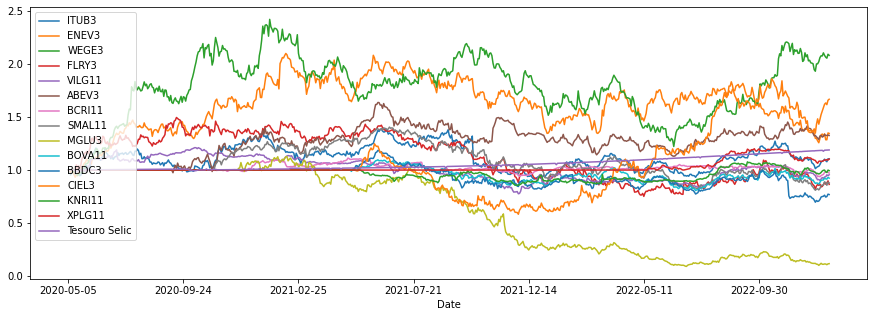

In [74]:
cotacao_carteira_normalizada.plot(figsize=(15,5))
plt.legend(loc='upper left')


### Vamos puxar o IBOV para comparar

[*********************100%***********************]  1 of 1 completed


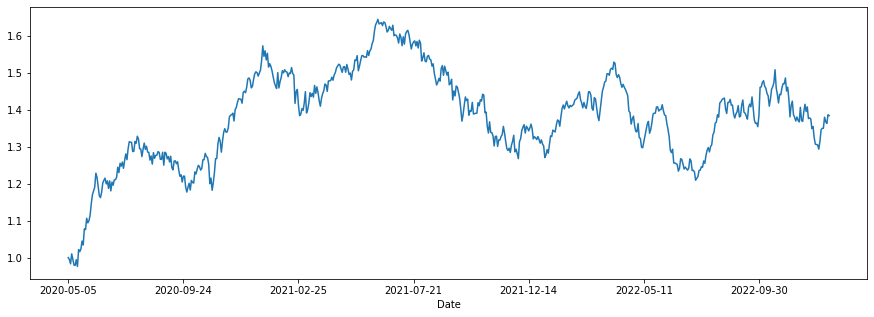

In [75]:
ibvsp = web.get_data_yahoo("^BVSP",start="2020-05-05",end="2022-12-31")['Adj Close']
ibvsp = ibvsp.rename(index=lambda x: x.strftime('%Y-%m-%d'))
ibvsp_norm = ibvsp / ibvsp.iloc[0]
ibvsp_norm.plot(figsize=(15,5))

### Comparação Carteira x IBOV

In [76]:
print("RETORNO")

for index, stock in enumerate(carteira['Ativos']): 
    retorno_carteira[stock] = retorno_carteira[stock] * carteira.loc[carteira['Ativos']==stock, 'Qtde'].values[0]
        
retorno_carteira['Total'] = retorno_carteira.sum(axis=1)
display(retorno_carteira)


RETORNO


,ITUB3,ENEV3,WEGE3,FLRY3,VILG11,ABEV3,BCRI11,SMAL11,MGLU3,BOVA11,BBDC3,CIEL3,KNRI11,XPLG11,Tesouro Selic,Total
Date,,,,,,,,,,,,,,,,
2020-05-05,7923.586273,2660.250092,9251.404762,1786.783218,31147.817230,2189.631844,9696.377563,10998.000336,465.177803,11468.000031,5038.237381,3142.586946,14002.212524,26708.422852,42427.64,178906.128855
2020-05-06,7814.545441,2660.250092,9251.404762,1786.783218,31147.817230,2189.631844,9696.377563,10998.000336,465.177803,11468.000031,5038.237381,3142.586946,14002.212524,26708.422852,42433.76,178803.208023
2020-05-07,7560.117340,2602.500057,9251.404762,1786.783218,31147.817230,2189.631844,9696.377563,10998.000336,465.177803,11468.000031,5038.237381,3142.586946,14002.212524,26708.422852,42439.84,178497.109888
2020-05-08,7756.394196,2662.500000,9251.404762,1786.783218,31147.817230,2189.631844,9696.377563,10998.000336,465.177803,11468.000031,5038.237381,3142.586946,14002.212524,26708.422852,42444.72,178758.266686
2020-05-11,7890.875244,2665.500069,9394.144058,1786.783218,31147.817230,2189.631844,9696.377563,10998.000336,465.177803,11468.000031,5038.237381,3142.586946,14002.212524,26708.422852,42449.56,179043.327099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,8736.949921,3569.999886,19250.000000,1577.999973,29119.580841,2923.999977,9475.465393,9780.000305,53.600001,10600.000000,3844.565964,5091.296196,13993.472290,29278.681183,50360.96,197656.571930
2022-12-26,8625.039673,3419.999886,19094.999313,1548.999977,29158.307648,2904.000092,9537.777710,9687.999725,53.200002,10515.000153,3755.358696,5130.000114,13761.141968,29198.284149,50386.56,196776.669105
2022-12-27,8545.104218,3419.999886,19004.999161,1569.999981,29745.167542,2904.000092,9561.515808,9419.999695,50.400000,10490.000153,3778.379631,5079.999924,13681.712341,29347.164917,50372.00,196970.443346


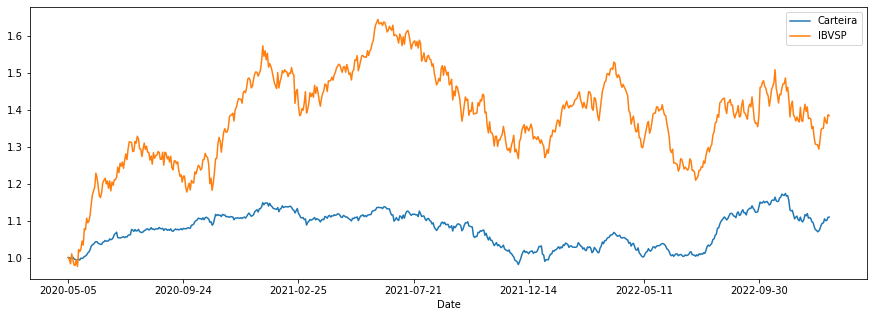

In [77]:
retorno_carteira_normalizado=retorno_carteira['Total']/retorno_carteira['Total'].iloc[0]
retorno_carteira_normalizado.plot(figsize=(15,5), label='Carteira')
ibvsp_norm.plot(figsize=(15,5), label = 'IBVSP')
plt.legend()

In [78]:
# retorno_porc = round((retorno_carteira['Total'][-1]/retorno_carteira['Total'][0]-1)*100, 2)
retorno_porc = round((retorno_carteira_normalizado.iloc[-1]-1)*100, 2)
print(f"Retorno da carteira foi de: {retorno_porc}%")

retorno_ibosvp = round((ibvsp_norm[-1]/ibvsp_norm[0]-1)*100, 2)
print(f"Retorno do ibovespa foi de: {retorno_ibosvp}%")

Retorno da carteira foi de: 10.97%
Retorno do ibovespa foi de: 38.45%


### Correlação da Carteira com o IBOV

In [79]:
correlacao = retorno_carteira['Total'].corr(ibvsp)
print(round(correlacao, 2)*100)

61.0


Inicial:


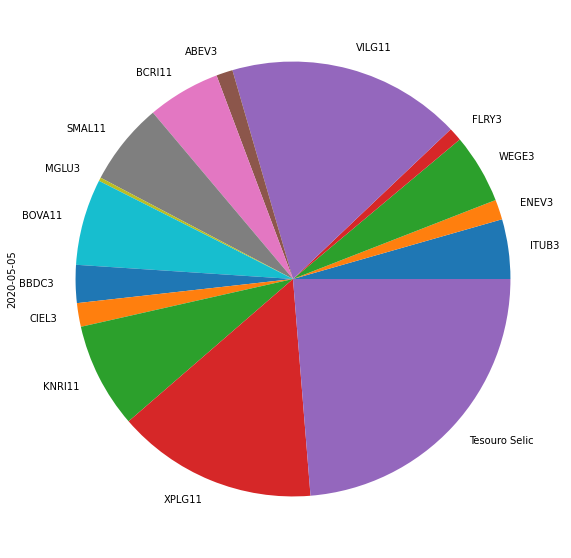

In [80]:
print('Inicial:')
retorno_carteira.iloc[0][:-1].plot.pie(y='Total', figsize=(15, 10))

Final:


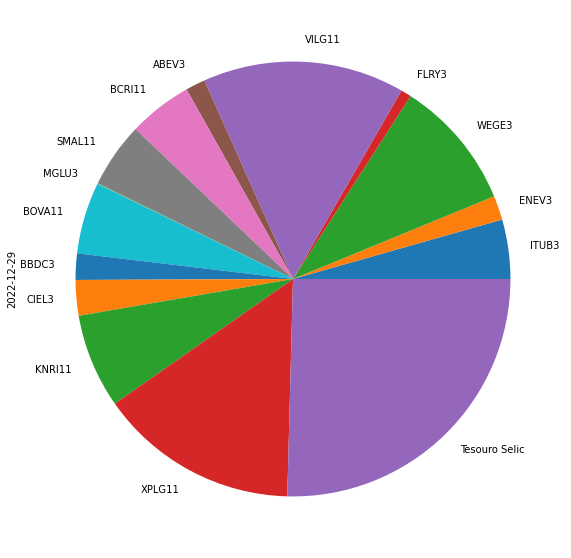

In [81]:
print('Final:')
retorno_carteira.iloc[-1][:-1].plot.pie(y='Total', figsize=(15, 10))